# Scraping and Plotting Basics



### The following topics are :
- Requesting a webpage
- Parsing the webpage using BeautifulSoup
- Extracting table data from the parsed webpage
- Using the seaborn library to plot data

We are woking on Counter Strike Global Offensive matches website 
https://www.hltv.org/stats/players/

In [1]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
## Required methods for scraping. This section can be converted into a function and reused.
## We request the url and open the webpage to be read
url = "https://www.hltv.org/stats/players/"
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7' #Ihad to add it extra
req = Request(url, headers={'User-Agent': user_agent,})
webpage = urlopen(req).read()

In [3]:
## This is where the actual parsing takes place. The html.parser is Python's own html.parser and can be replaced with
## faster parsers like lxml's HTML parser/XML , which are external C dependencies.
soup = bs(webpage,'html.parser')

In [4]:
print(soup.title.text)

CS:GO Player statistics database | HLTV.org


In [5]:
## We need the information inside the tags 'tr', ie the rows.
## So let us find the rows in the table, and convert the whole table into a list, 
## which in turn we will convert into a pandas DataFrame for further manipulation.
## Finding all tags <x> can be accomplished via the soup.findAll('x') method.
## This section contains some code which cleans up the 

data = []
record = []
for row in soup.findAll('tr'):
    st = row.text[1:]
    record = st.split('\n')
    data.append(record[0:len(st)-2])

data = pd.DataFrame(data)
data.drop([7,6,4],axis = 1,inplace = True)  #there is no team details after scraping
data.drop(0,axis = 0,inplace = True)
data.rename(columns = {0:'Player', 1:'Team', 2:'Maps', 3:'KDRatio',5:'Rating'},inplace = True)
data= pd.read_csv("counterstrike.csv")
print(data.head())

   Unnamed: 0    Player            Team  Maps  KDRatio  Rating
0           1     BnTeT           TyLoo   215     1683    1.36
1           2  XANTARES  Space Soldiers   491     2357    1.25
2           3      kaze             NaN   217     1125    1.22
3           4  coldzera              SK   563     3027    1.22
4           5     kNgV-       Immortals   191      926    1.21


In [6]:
## Let us now see the datatypes
data.dtypes

Unnamed: 0      int64
Player         object
Team           object
Maps            int64
KDRatio         int64
Rating        float64
dtype: object

In [7]:
## Changing the datatypes of entire columns
data[['Maps','KDRatio','Rating']] = data[['Maps','KDRatio','Rating']].apply(pd.to_numeric)
data.dtypes

Unnamed: 0      int64
Player         object
Team           object
Maps            int64
KDRatio         int64
Rating        float64
dtype: object

In [8]:
## Saving this dataframe to a csv
data.to_csv("CSGO.csv", sep=',', encoding='utf-8')

In [9]:
## Let us create some benchmarks
stats = data.describe()
print(stats)
mean_kdr = stats['KDRatio']['mean']
mean_maps = stats['Maps']['mean']
mean_rating = stats['Rating']['mean']

       Unnamed: 0         Maps      KDRatio      Rating
count  412.000000   412.000000   412.000000  412.000000
mean   206.500000   440.354369   373.594660    1.019078
std    119.078406   256.849186   924.322127    0.080319
min      1.000000   187.000000 -2869.000000    0.750000
25%    103.750000   238.750000  -165.250000    0.970000
50%    206.500000   350.000000   207.500000    1.020000
75%    309.250000   562.250000   781.000000    1.070000
max    412.000000  1249.000000  4890.000000    1.360000


In [10]:
## Now we would like to filter teams based on the three columns
## For that lets first divide the dataset by teams
KD_stats = data.groupby('Team').KDRatio.agg(['min','max','mean'])
Maps_stats = data.groupby('Team').Maps.agg(['min','max','mean'])
Rating_stats = data.groupby('Team').Rating.agg(['min','max','mean'])

In [11]:
## Sorting the team based dataframes and finding the top 10 in each category
top_teams_kd = pd.DataFrame(KD_stats.sort_values(['mean'],ascending = False).head(15))
top_teams_kd = top_teams_kd.reset_index()
top_teams_kd.head()

,Team,min,max,mean
0,NiP,869,4890,2583.0
1,G2,100,4557,2140.2
2,fnatic,877,2893,2118.2
3,Astralis,453,3730,1957.6
4,Natus Vincere,698,3502,1735.0


In [12]:
top_teams_rating = pd.DataFrame(Rating_stats.sort_values(['mean'],ascending = False).head(15))
top_teams_rating = top_teams_rating.reset_index()
top_teams_rating.head()

,Team,min,max,mean
0,TyLoo,1.06,1.36,1.154000
1,LGD,1.14,1.14,1.140000
2,Flash,1.11,1.15,1.126667
3,MaxAndRelax,1.11,1.11,1.110000
4,NiP,1.04,1.17,1.106000


In [13]:
top_teams_map = pd.DataFrame(Maps_stats.sort_values(['mean'],ascending = False).head(15))
top_teams_map = top_teams_map.reset_index()
top_teams_map.head()

,Team,min,max,mean
0,Virtus.pro,1063,1249,1167.0
1,G2,424,1187,966.0
2,fnatic,629,1117,928.6
3,Astralis,749,1083,914.8
4,NiP,394,1158,855.6


In [14]:
## Importing the seaborn library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib notebook


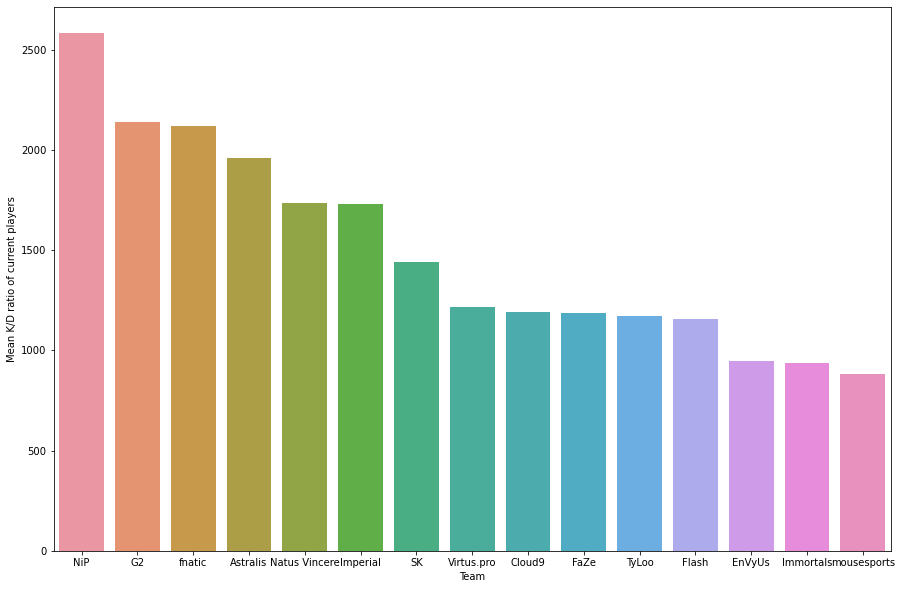

In [15]:
## This line sets the figure size
plt.rcParams['figure.figsize']=(15,10)

## This line plots the data. Here we are using the barplot() of seaborn.
## Normal arguments are x = column to be used for x-axis, same for y, and data = dataframe to be used
ax = sns.barplot(x = 'Team', y = 'mean',data = top_teams_kd)

## Setting the y-label
plt.ylabel("Mean K/D ratio of current players")

plt.show()

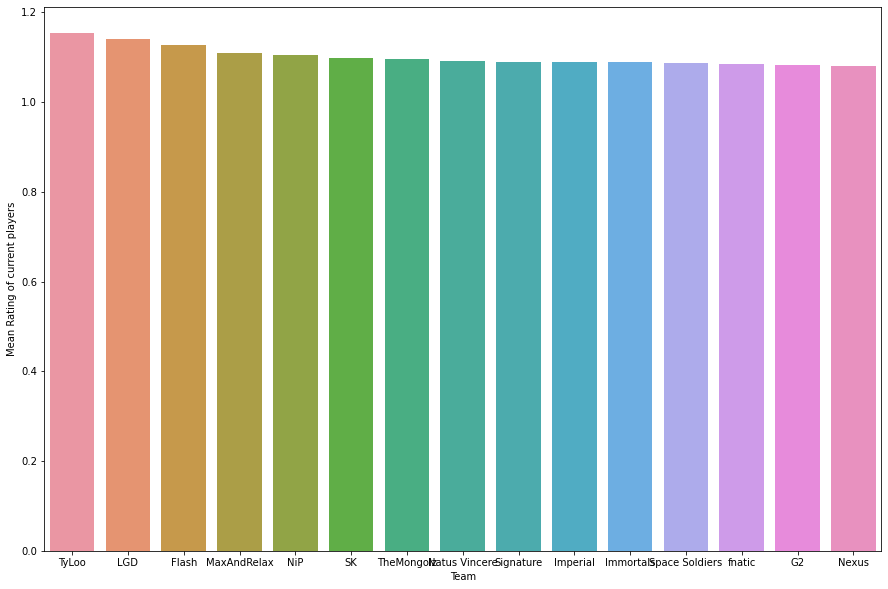

In [16]:
ax = sns.barplot(x = 'Team', y = 'mean',data = top_teams_rating)

## Setting the y-label
plt.ylabel("Mean Rating of current players")

plt.show()

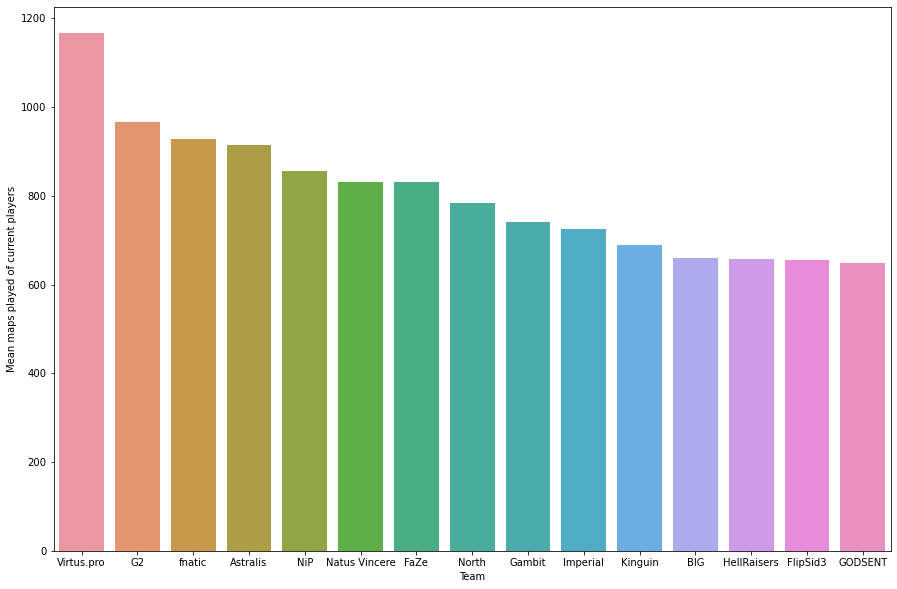

In [17]:
ax = sns.barplot(x = 'Team', y = 'mean',data = top_teams_map)

## Setting the y-label
plt.ylabel("Mean maps played of current players")

plt.show()